In [1]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import defaultdict



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [4]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1ZJjidjWxQZXg7N88QtDKbdz7uy0_e5WG/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Online News Popularity.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Online News Popularity.csv')
data.head(20)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.4000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.5000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.5000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.1250,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.5000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [5]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

(None,
           timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
 count  39644.000000    39644.000000      39644.000000     39644.000000   
 mean     354.530471       10.398749        546.514731         0.548216   
 std      214.163767        2.114037        471.107508         3.520708   
 min        8.000000        2.000000          0.000000         0.000000   
 25%      164.000000        9.000000        246.000000         0.470870   
 50%      339.000000       10.000000        409.000000         0.539226   
 75%      542.000000       12.000000        716.000000         0.608696   
 max      731.000000       23.000000       8474.000000       701.000000   
 
        n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
 count      39644.000000              39644.000000  39644.000000   
 mean           0.996469                  0.689175     10.883690   
 std            5.231231                  3.264816     11.332017   
 min            0.000000                  0.

In [9]:

if 'url' in data.columns:
    data = data.drop('url', axis=1)
    print("Column 'url' dropped successfully.")
else:
    print("Column 'url' not found in the DataFrame.")

data.head() # Display the DataFrame after dropping the column

Column 'url' dropped successfully.


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
missing_values = data.isnull().sum()
missing_values

,0
url,0
timedelta,0
n_tokens_title,0
n_tokens_content,0
n_unique_tokens,0
...,...
title_subjectivity,0
title_sentiment_polarity,0
abs_title_subjectivity,0
abs_title_sentiment_polarity,0


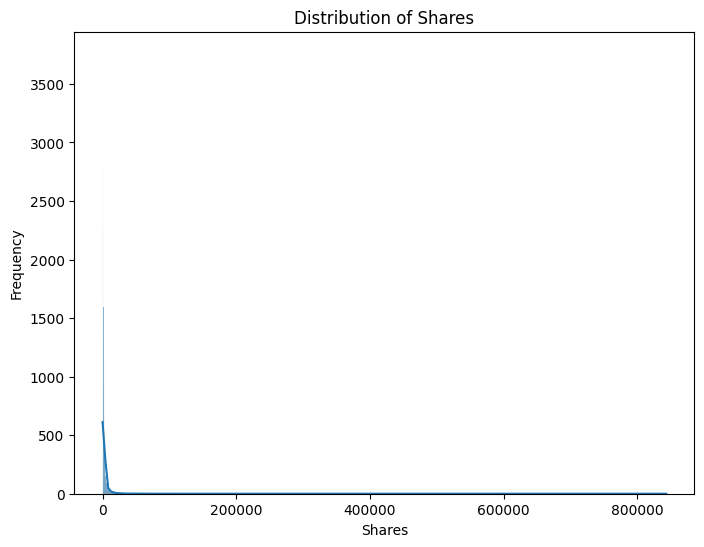

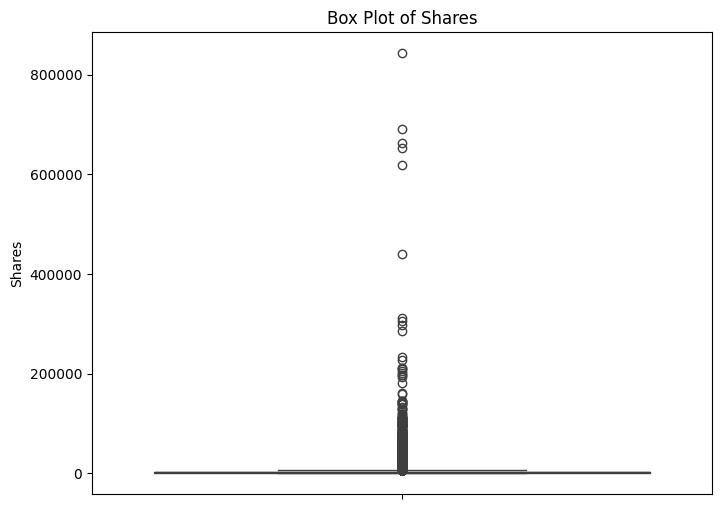

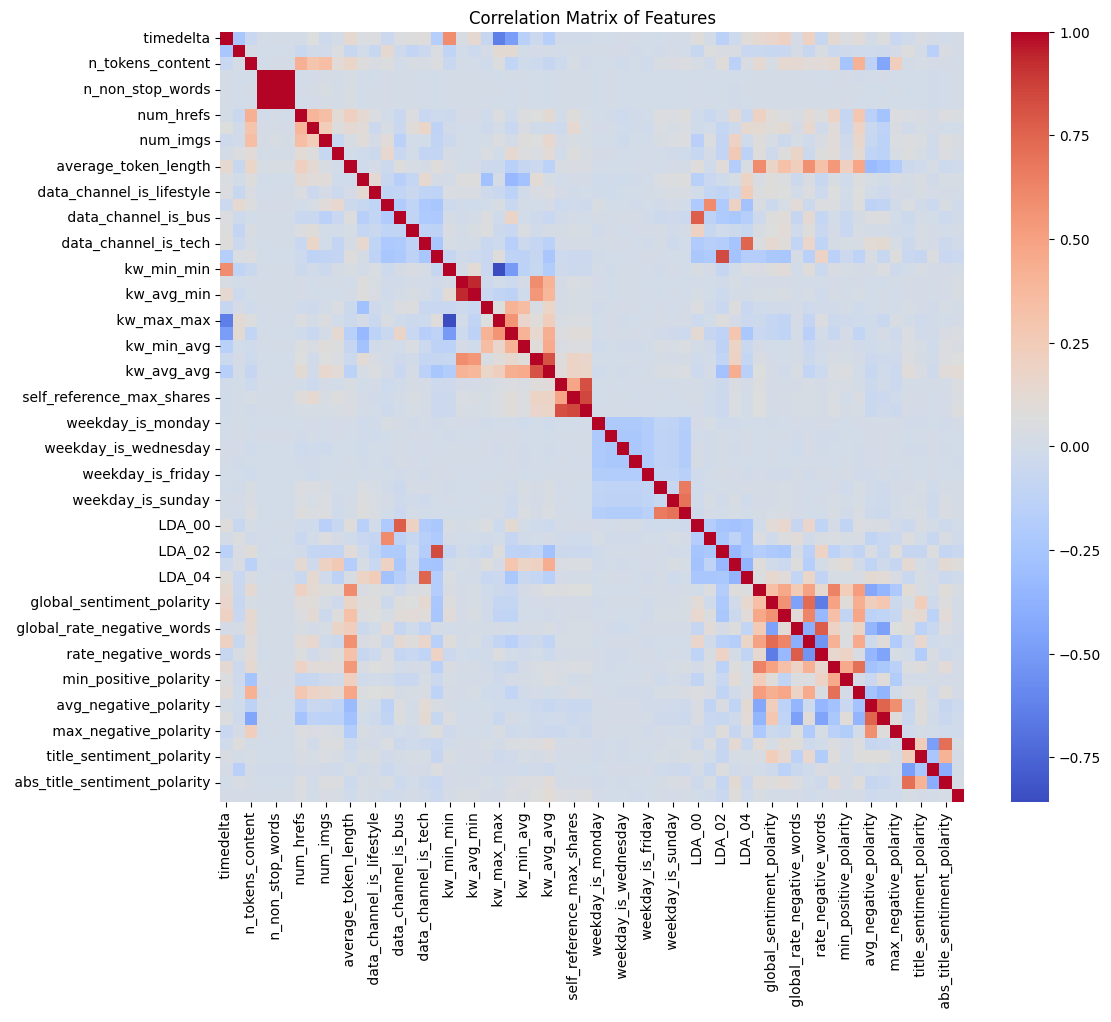

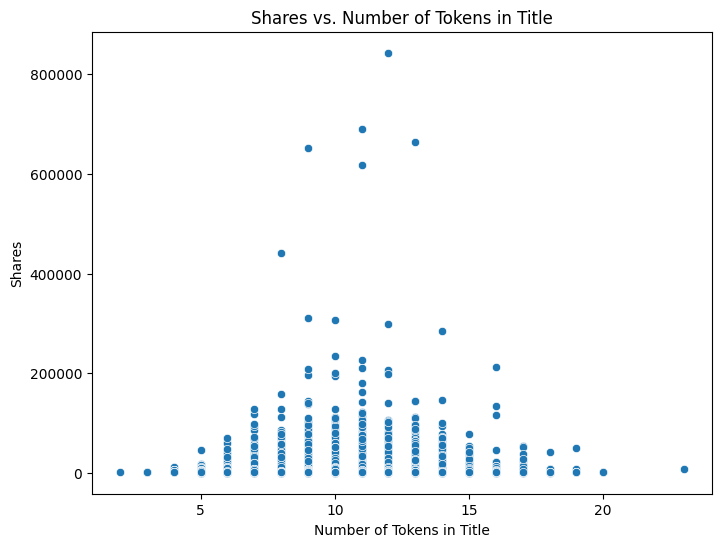

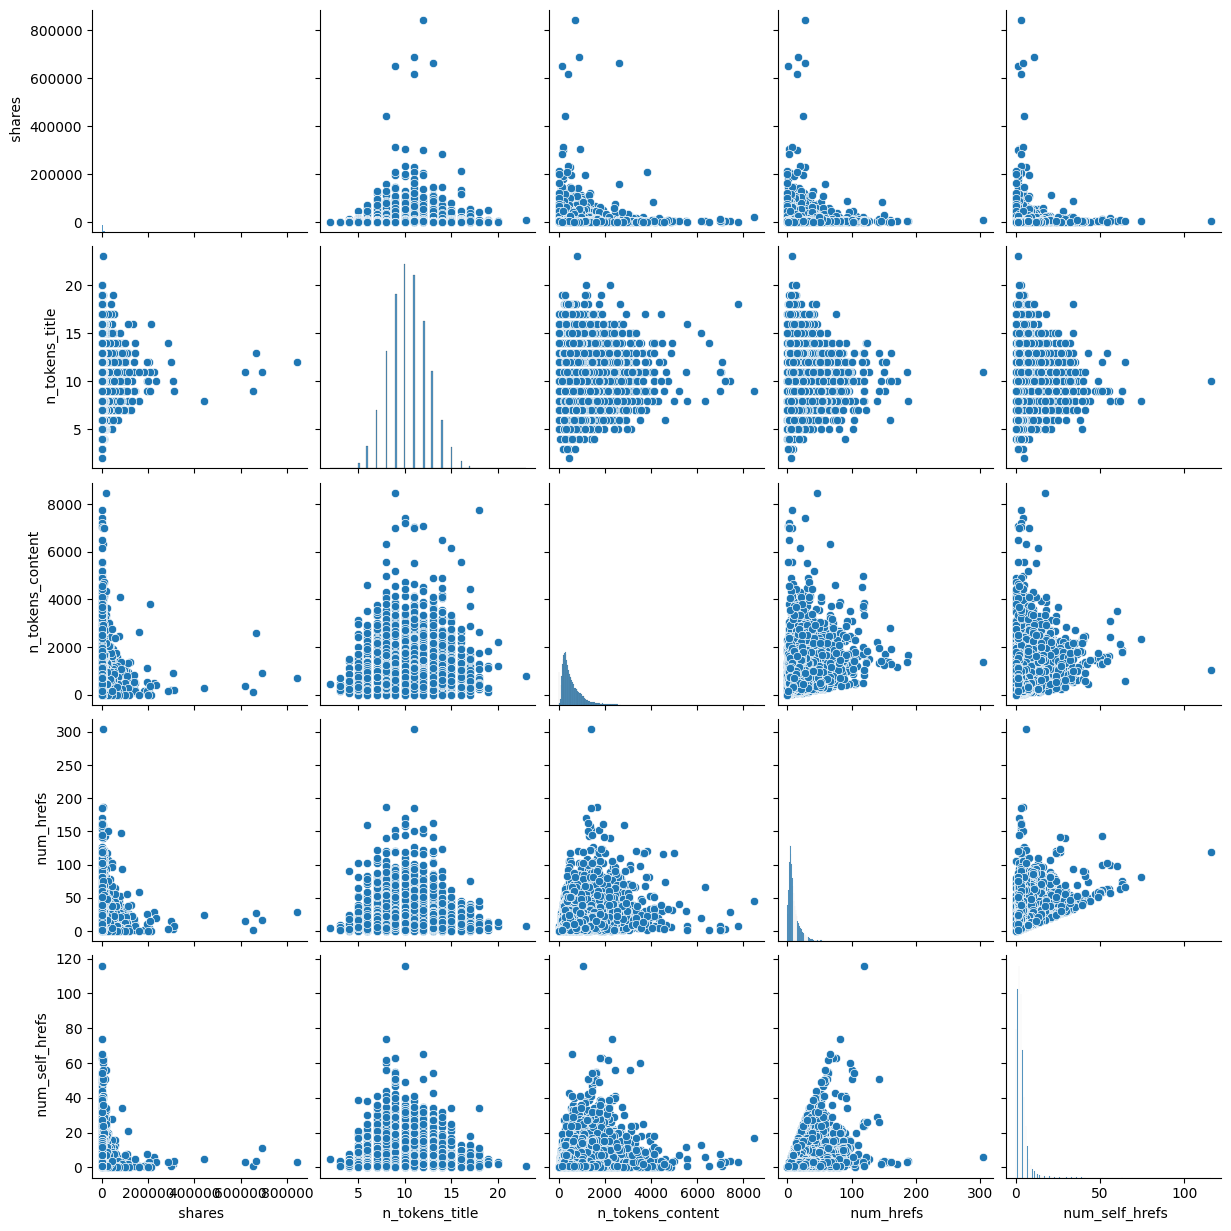

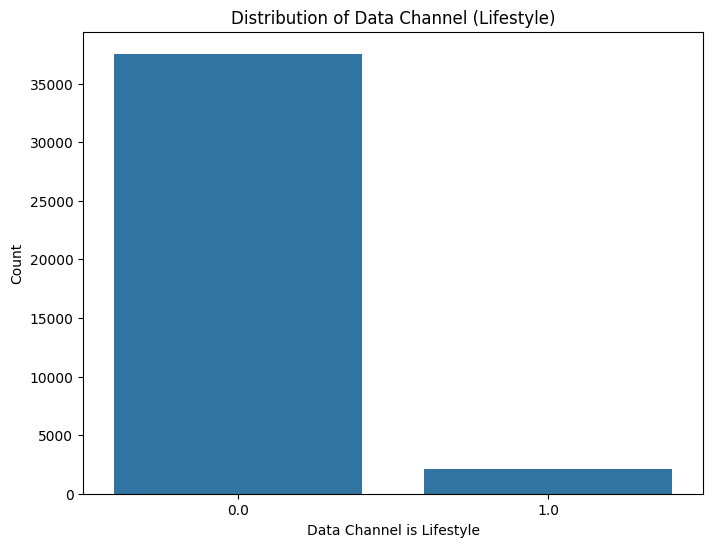

In [10]:
# Visualizations

# Distribution of target variable
plt.figure(figsize=(8, 6))
# Check if the column name is ' shares' instead of 'shares'
sns.histplot(data[' shares'], kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Box plot of shares
plt.figure(figsize=(8, 6))
# Check if the column name is ' shares' instead of 'shares'
sns.boxplot(y=data[' shares'])
plt.title('Box Plot of Shares')
plt.ylabel('Shares')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Scatter plot of shares vs. a relevant feature (e.g., n_tokens_title)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' n_tokens_title', y=' shares', data=data) # Check if column names have leading space
plt.title('Shares vs. Number of Tokens in Title')
plt.xlabel('Number of Tokens in Title')
plt.ylabel('Shares')
plt.show()

# Pairplot for a subset of relevant features
selected_features = [' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs'] # Check if column names have leading space
sns.pairplot(data[selected_features])
plt.show()

# Bar plot for categorical features (if any) - Example (replace with your actual categorical feature)
# Assuming 'data_channel_is_lifestyle' is a categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(x=' data_channel_is_lifestyle', data=data) # Check if column names have leading space
plt.title('Distribution of Data Channel (Lifestyle)')
plt.xlabel('Data Channel is Lifestyle')
plt.ylabel('Count')
plt.show()




In [16]:

# Separate features (X) and target (y)
X = data.drop(' shares', axis=1)
y = data[' shares']

# Initialize StandardScaler
scaler_X = StandardScaler()
# Fit and transform the features
X_scaled = scaler_X.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

# Example: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)



Epoch 1/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6126 - mae: 0.3176 - val_loss: 0.4704 - val_mae: 0.2603
Epoch 2/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7898 - mae: 0.2598 - val_loss: 0.4687 - val_mae: 0.2872
Epoch 3/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2136 - mae: 0.2793 - val_loss: 0.4686 - val_mae: 0.2577
Epoch 4/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0619 - mae: 0.2789 - val_loss: 0.4711 - val_mae: 0.2526
Epoch 5/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1291 - mae: 0.2660 - val_loss: 0.4727 - val_mae: 0.2618
Epoch 6/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0741 - mae: 0.2753 - val_loss: 0.4744 - val_mae: 0.2599
Epoch 7/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9512 - mae: 0.2882 - val_loss: 0.4757 - val_mae: 0.2428
Epoch 8/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0731 - mae: 0.2696 - val_loss: 0.4918 - val_mae: 0.2653
Epoch 9/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lo

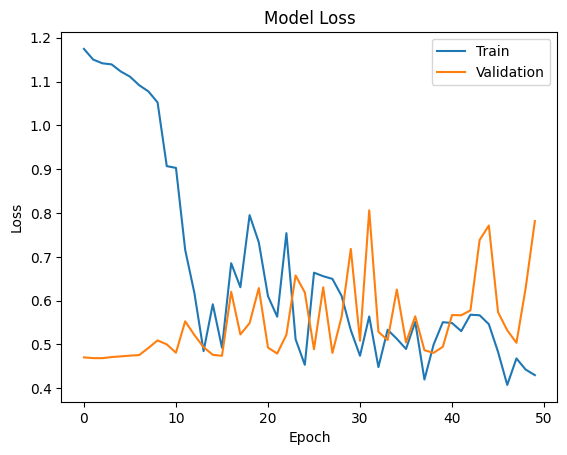

In [17]:
# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {mae}")

y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

#Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [19]:

# Save the model
model.save('news_popularity_model.h5')


In [22]:

# Load the model
# Load the model with custom_objects
loaded_model = tf.keras.models.load_model('news_popularity_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

# Load the scalers
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Example of a new record (replace with actual data)
new_record = pd.DataFrame(X.iloc[[13]])


# Preprocess the new record using the loaded scaler
new_record_scaled = scaler_X.transform(new_record)


# Make a prediction using the loaded model
new_prediction_scaled = loaded_model.predict(new_record_scaled)

# Inverse transform the prediction to get the original scale
new_prediction = scaler_y.inverse_transform(new_prediction_scaled)

print(f"Prediction for the new record: {new_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Prediction for the new record: 3891.75439453125
